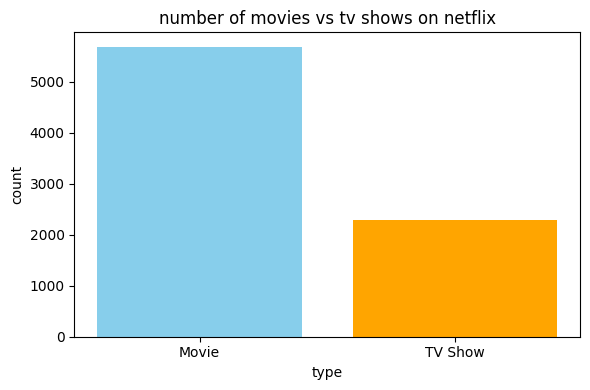

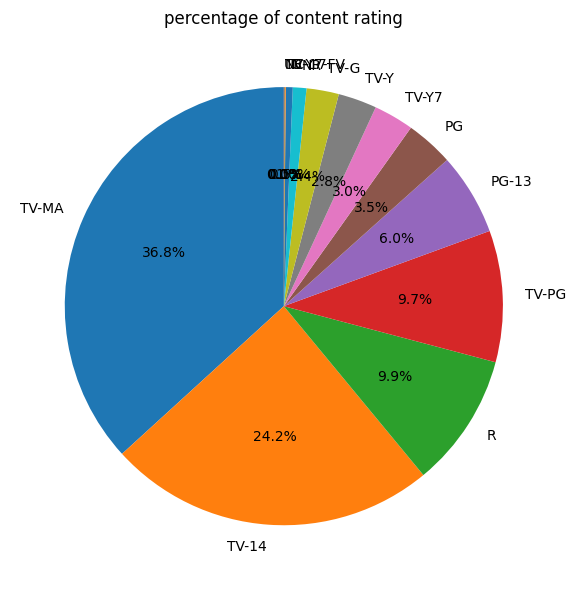

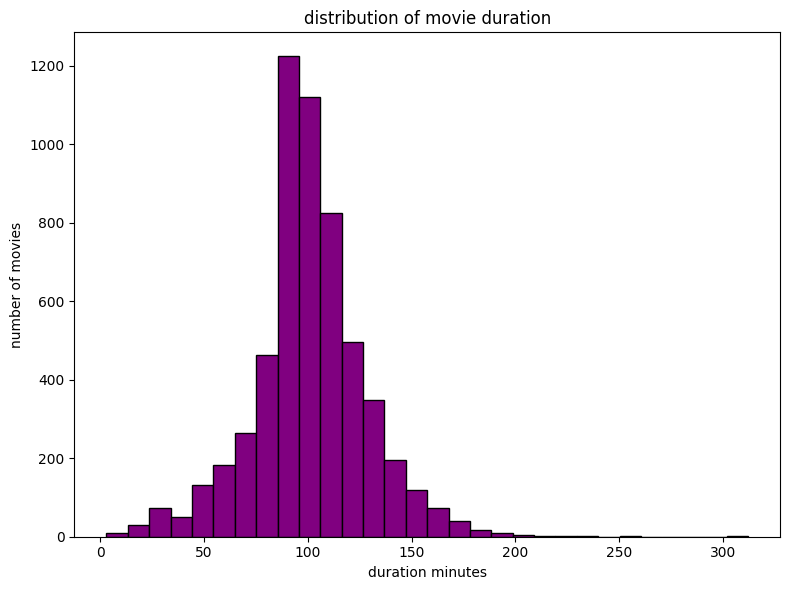

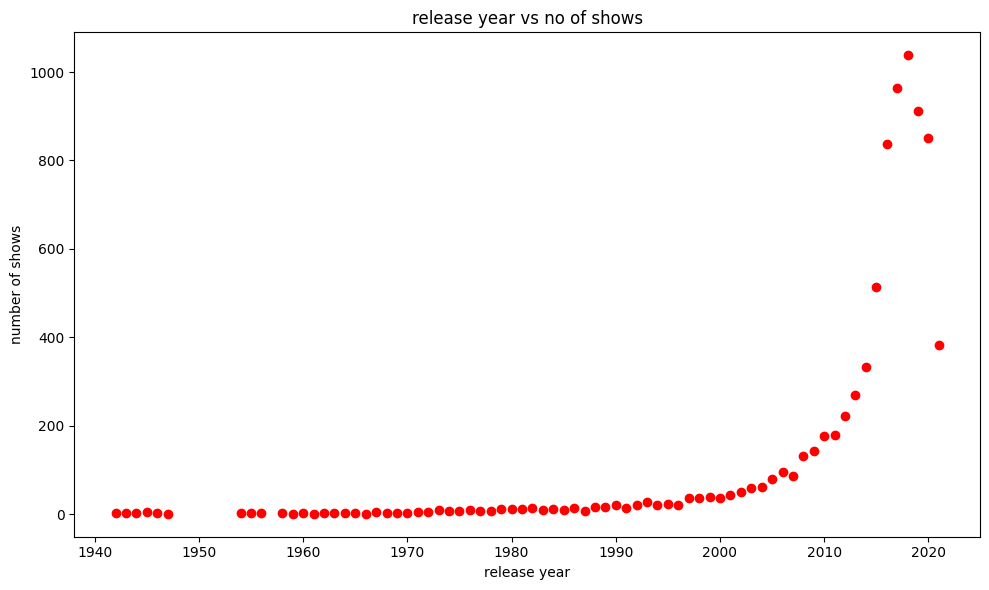

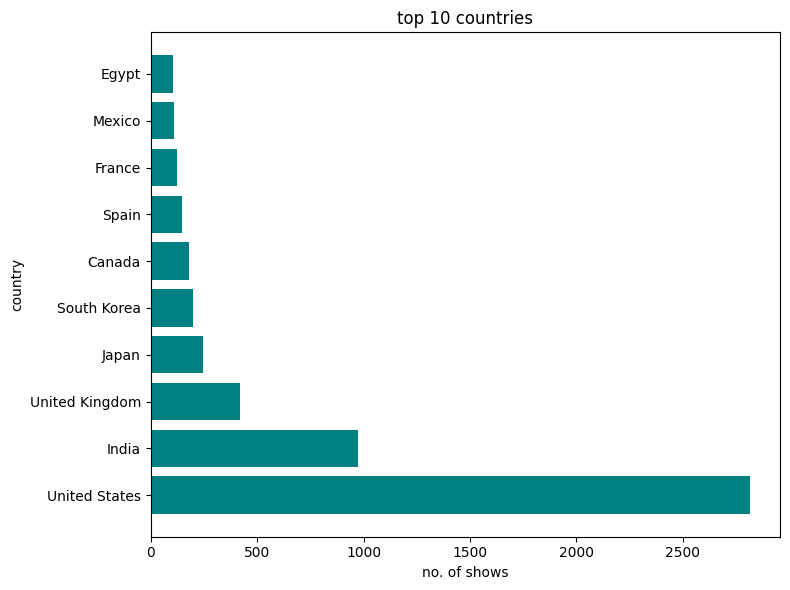

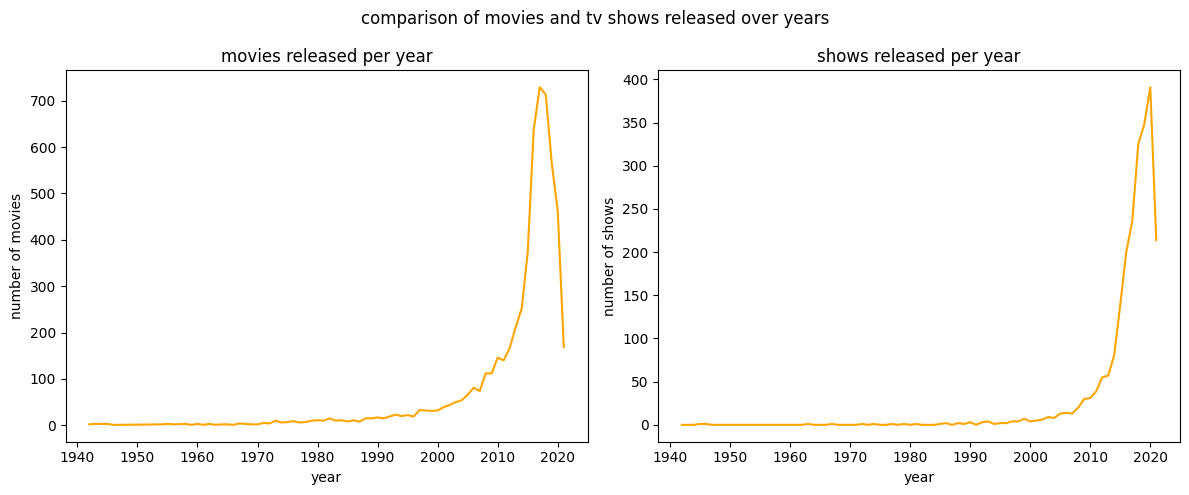

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_titles.csv')

df = df.dropna(subset=['type','release_year','rating','country','duration'])

type_counts = df['type'].value_counts()
plt.figure(figsize = (6,4))
plt.bar(type_counts.index,type_counts.values,color = ['skyblue','orange'])
plt.title('number of movies vs tv shows on netflix')
plt.xlabel('type')
plt.ylabel('count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels = rating_counts.index,autopct = '%1.1f%%',startangle = 90)
plt.title('percentage of content rating')
plt.tight_layout()
plt.savefig('content_rating.png')
plt.show()

movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace(' min','').astype(int)

plt.figure(figsize = (8,6))
plt.hist(movie_df['duration_int'],bins = 30,color = 'purple',edgecolor = 'black')
plt.title('distribution of movie duration')
plt.xlabel('duration minutes')
plt.ylabel('number of movies')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index,release_counts.values,color = 'red')
plt.title('release year vs no of shows')
plt.xlabel('release year')
plt.ylabel('number of shows')
plt.tight_layout()
plt.savefig('release_year.png')
plt.show()

country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values,color = 'teal')
plt.title('top 10 countries')
plt.xlabel('no. of shows')
plt.ylabel('country')
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show()

content_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fig, ax = plt.subplots(1,2,figsize = (12,5))

ax[0].plot(content_year.index,content_year['Movie'],color = 'orange')
ax[0].set_title('movies released per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('number of movies')

ax[1].plot(content_year.index,content_year['TV Show'],color = 'orange')
ax[1].set_title('shows released per year')
ax[1].set_xlabel('year')
ax[1].set_ylabel('number of shows')

fig.suptitle('comparison of movies and tv shows released over years')

plt.tight_layout()
plt.savefig('movies_tv_shows.png')
plt.show()